<a href="https://colab.research.google.com/github/emanuelcovaci/Heart-Failure-Prediction/blob/main/Insuficien%C8%9Ba_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Emanuel Covaci**

Dataset https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


**Insuficiența cardiacă afectează aproximativ un milion de români și reprezintă principala cauză de deces cardiovascular la nivel național, alături de infarctul miocardic și accidentul vascular cerebral**

**Principalii factori de risc cardiovascular sunt: fumatul, colesterolul crescut, hipertensiunea arteriala, diabetul zaharat, obezitatea, stresul, sedentarismul.**

**In acest proiect imi propun sa analizez principalii factori de risc si pe baza acestora sa prezic sansele de deces**

In [172]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [173]:

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [174]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
193,73.0,1,231,1,30,0,160000.0,1.18,142,1,1,180,0
284,50.0,1,54,0,40,0,279000.0,0.80,141,1,0,250,0
195,77.0,1,418,0,45,0,223000.0,1.80,145,1,0,180,1
33,50.0,1,159,1,30,0,302000.0,1.20,138,0,0,29,0
11,62.0,0,231,0,25,1,253000.0,0.90,140,1,1,10,1
243,73.0,1,1185,0,40,1,220000.0,0.90,141,0,0,213,0
269,40.0,0,582,1,35,0,222000.0,1.00,132,1,0,244,0
55,95.0,1,371,0,30,0,461000.0,2.00,132,1,0,50,1
22,68.0,1,220,0,35,1,289000.0,0.90,140,1,1,20,1
3,50.0,1,111,0,20,0,210000.0,1.90,137,1,0,7,1


In [175]:
from sklearn.model_selection import train_test_split
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X.shape, y.shape

((299, 12), (299,))

In [176]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=69)

**SMOTE: Synthetic Minority Over-sampling**
https://arxiv.org/pdf/1106.1813.pdf
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [154]:
from imblearn.over_sampling import SMOTE
X_smote,y_smote = SMOTE().fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify = y_smote, test_size=0.25, random_state=69)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

counts = {int(value): list(y_smote).count(value) for value in set(y_smote)}
print(counts)

Shape of X_train: (304, 12)
Shape of X_test: (102, 12)
Shape of y_train: (304,)
Shape of y_test: (102,)
{0: 203, 1: 203}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [178]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression


In [179]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.92      0.90      0.91        51

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102



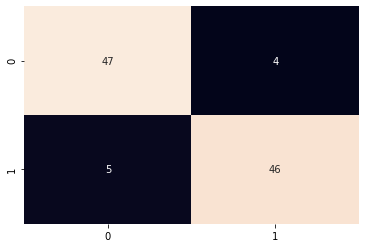

In [168]:
print(classification_report(y_test, y_pred))

      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

In [157]:
acclist = []
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [180]:
from sklearn.svm import SVC

In [181]:
svc = SVC(kernel='linear')
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        51
           1       0.87      0.54      0.67        24

    accuracy                           0.83        75
   macro avg       0.84      0.75      0.77        75
weighted avg       0.83      0.83      0.81        75



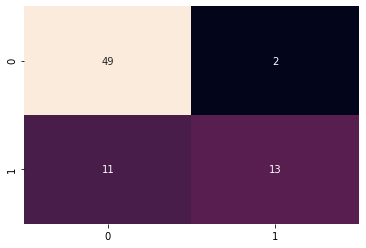

In [182]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.76      0.54      0.63        24

    accuracy                           0.80        75
   macro avg       0.79      0.73      0.75        75
weighted avg       0.80      0.80      0.79        75



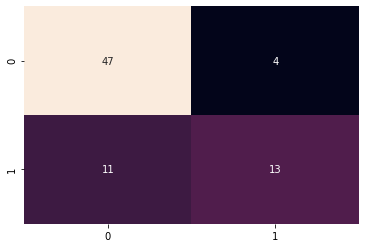

In [185]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier(n_estimators=55)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        51
           1       0.79      0.62      0.70        24

    accuracy                           0.83        75
   macro avg       0.81      0.77      0.79        75
weighted avg       0.82      0.83      0.82        75



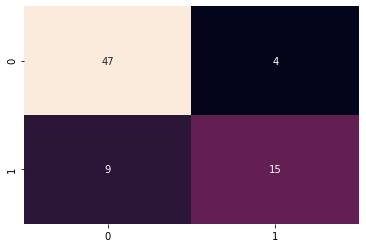

In [188]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [198]:
acclist

[0.7647058823529411,
 0.7549019607843137,
 0.8431372549019608,
 0.9117647058823529,
 0.8266666666666667,
 0.8,
 0.8266666666666667]

In [199]:
models = ['Logistic Regression','SVM','Decision Tree', 'Random Forest']


In [200]:
plt.figure(figsize=(15,10))
sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

KeyError: ignored

<Figure size 1080x720 with 0 Axes>

In [192]:
plt.figure(figsize=(15,10))
sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

KeyError: ignored

<Figure size 1080x720 with 0 Axes>

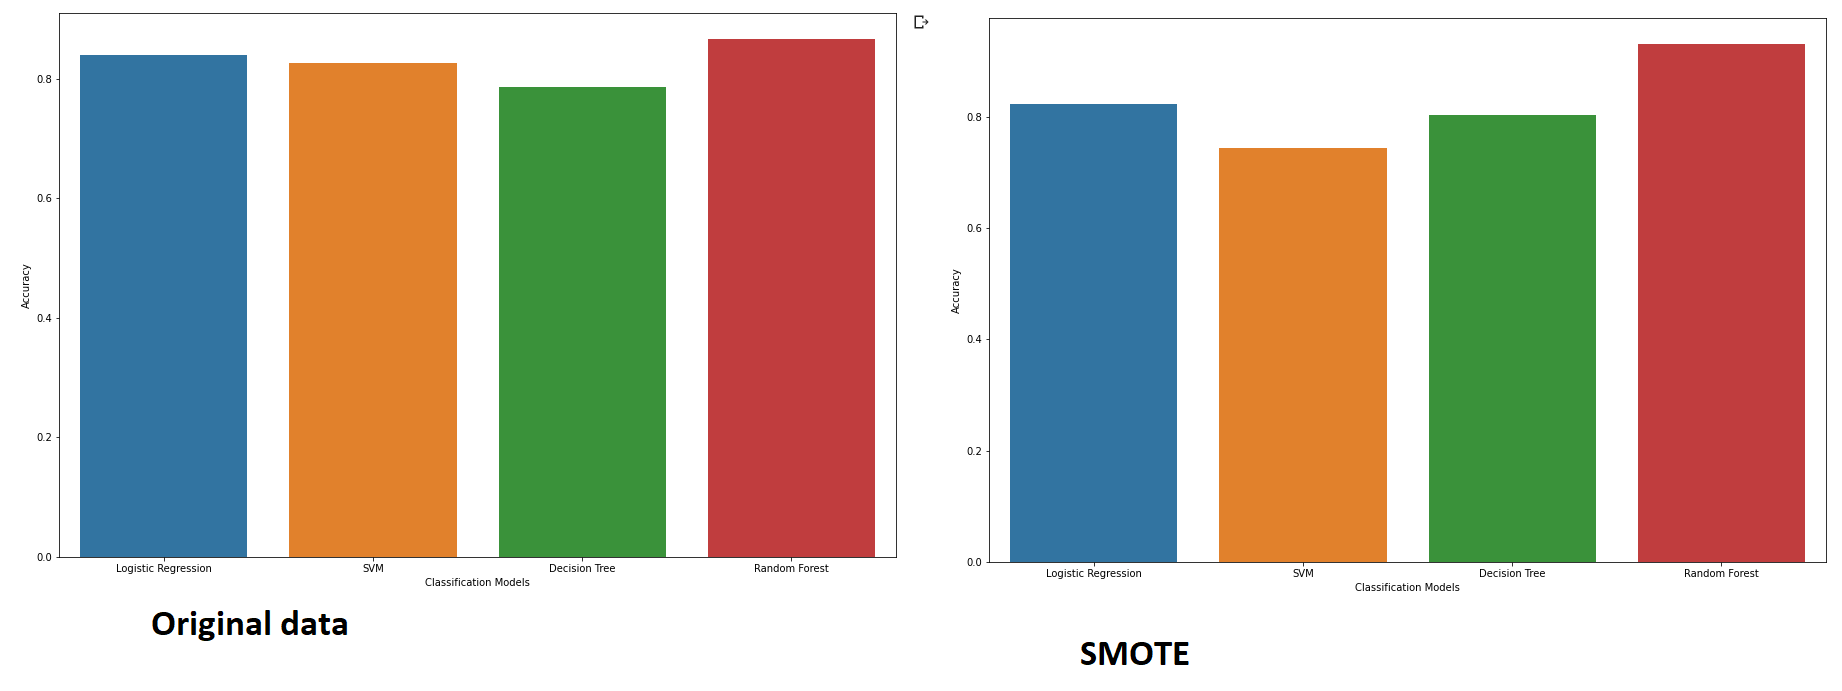